In [134]:
#Import the necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

<h1>Training the dataset</h1>

In [135]:
#Read the train dataset
Train= pd.read_csv('C:/Users/mauli/Documents/NeuralTEE/flowerTrain.csv')

In [136]:
#Visualize the dataset
Train.head()

,X,Y,Class
0,2.307110,-1.534284,0
1,3.490440,-1.852631,0
2,-0.068807,-1.131119,0
3,-3.858111,1.423514,1
4,-1.158977,-1.511957,1


In [137]:
#To know the columns
Train.columns

Index(['X', 'Y', 'Class'], dtype='object')

In [138]:
#to know the size of the data set
Train.shape

(280, 3)

In [139]:
#Extract the independent or predictor variables
X_train= Train.drop(['Class'],axis=1)

In [140]:
#Extract the target variables
y_train=Train[['Class']]

In [141]:
#taking transpose of train data
X_train=X_train.transpose()
y_train=y_train.transpose()

In [142]:
#visualize train predictor data
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
X,2.307110,3.490440,-0.068807,-3.858111,-1.158977,-1.854369,-0.293821,0.730781,2.083778,3.064353,...,0.231615,3.179932,1.680973,-1.022485,-1.451884,1.130357,-0.393228,-2.913734,1.753711,0.034629
Y,-1.534284,-1.852631,-1.131119,1.423514,-1.511957,0.191934,-0.305909,3.068329,1.434287,0.733792,...,1.813805,-0.753075,-1.194522,3.551916,-0.122171,-0.887427,2.412339,-1.819201,1.347983,0.035609


In [143]:
#Visualize train target data
y_train.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
Class,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [144]:
#Convert train target data to numpy array for ease in processing
y_train=np.array(y_train)

In [145]:
#To ascertain the shape of training X and y
#We take the count of number of samples in variable m
m=y_train.shape[1]
print("Shape of input matrix X is: ",X_train.shape)
print("Shape of input matrix Y is: ",y_train.shape)
print("No of training samples is: ",m)

Shape of input matrix X is:  (2, 280)
Shape of input matrix Y is:  (1, 280)
No of training samples is:  280


In [146]:
#Function to ascertain the number of nodes in input layer, output layer and hidden layer
def layer_sizes(X, y):
  
    n_x= X.shape[0] #the size of the input layer
    n_h=10 #the size of the hidden layer
    n_y=y.shape[0] #the size of the output layer
    
    return (n_x, n_h, n_y)

In [147]:
#check the layer_sizes function
n_x,n_h,n_y= layer_sizes(X_train,y_train)
print(n_x,n_h,n_y)

2 10 1


In [148]:
#Function to initialize parameters W and b. Function will return the values of W and b
def initialize_parameters(n_x, n_h, n_y):
    
    #These four lines of the code can be used to generate random matrix for W1 and W2

    W1= np.random.randn(n_h,n_x)*0.1 #weight matrix of shape (n_h, n_x)
    W2=np.random.randn(n_y,n_h)*0.1#weight matrix of shape (n_y, n_h)
    b1= np.zeros(shape=(n_h,1)) #bias vector of shape (n_h, 1)
    b2= np.zeros(shape=(n_y,1)) #bias vector of shape (n_y, 1)
    return W1,W2,b1,b2
   

In [149]:
#Check initialize_parameter function

W1,W2,b1,b2=initialize_parameters(n_x, n_h, n_y)
print("Intial value of matrix W1 is\n", W1)
print("\n Intial value of matrix W2 is\n",W2)
print("\n Intial value of matrix b1 is\n",b1)
print("\nIntial value of matrix b1 is\n",b2)

Intial value of matrix W1 is
 [[ 0.1551313   0.19998561]
 [ 0.14152714  0.01088074]
 [ 0.00977757 -0.15481768]
 [ 0.12059069 -0.03775982]
 [ 0.188374    0.06367029]
 [-0.06747608 -0.16192255]
 [ 0.060559    0.12757343]
 [ 0.07540918 -0.04016945]
 [-0.0041745   0.17177931]
 [-0.07145659  0.03008605]]

 Intial value of matrix W2 is
 [[-0.05963403 -0.12240498 -0.05116992 -0.01054612  0.18599322 -0.24979997
   0.02013211 -0.02489014 -0.06002683 -0.09123306]]

 Intial value of matrix b1 is
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Intial value of matrix b1 is
 [[0.]]


<h1>Forward Propagation

In [150]:
#Function to implement forward_propagation
#this function will obtain the values of Z1, A1, Z2 A2 and cost
def forward_propagation(X,W1,W2,b1,b2):
    Z1= np.dot(W1,X)+b1
    #A1= 1/(1+np.exp(-Z1)) #Using sigmoid function for the last layer
    A1= np.tanh(Z1) #Using tanh function for the middle layer
    Z2= np.dot(W2,A1)+b2
    A2= 1/(1+np.exp(-Z2)) #Using sigmoid function for the last layer
    
    return Z1,A1,Z2,A2

In [151]:
#Function to compute cost function
def compute_cost(A2, Y, m):
    logJ= np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    J=-(1/m)*np.sum(logJ)
    
    return (J)

<h1>Backward Propagation

In [152]:
def backward_propagation(W1,W2,A1,A2,Y,m,X):
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1,keepdims=True)
    return dZ2,dW2,db2,dZ1,dW1,db1,db2

In [153]:
#Function to update the parameter W and b values
#This function will return upadted values of W1, W2, b1, b2
def update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [154]:
#This single function will call all the functions and retrun the cost function values
#and the final value of the W and b parameters
def iterations(X,y,iterNo, alpha):
    J=np.zeros(iterNo)
    n_x,n_h,n_y= layer_sizes(X,y)
    W1,W2,b1,b2=initialize_parameters(n_x, n_h, n_y)
    for i in range(iterNo):

        Z1,A1,Z2,A2=forward_propagation(X,W1,W2,b1,b2)
        cost=compute_cost(A2,y,m)
        if iterNo%4==0:
            print(cost)
        
        J[i]=cost
        dZ2,dW2,db2,dZ1,dW1,db1,db2=backward_propagation(W1,W2,A1,A2,y,m,X)
        W1,b1,W2,b2=update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha)
    return W1,b1,W2,b2,J
  
  

In [155]:
#Enter the number of iterations for which we want to run the loop for forward and
#backward propagation
iterNo=int(input("Enter the number of iterations: "))
alpha= float(input("Enter the learning rate: "))


Enter the number of iterations: 10000
Enter the learning rate: 0.0075


In [156]:
W1, b1,W2,b2,J= iterations(X_train,y_train,iterNo, alpha)
print("The cost for {} iterations is \n {}".format(iterNo, J))

0.6911623801215693
0.6911439314706164
0.6911255134965276
0.6911071261100931
0.6910887692225604
0.6910704427456322
0.6910521465914639
0.6910338806726608
0.6910156449022753
0.6909974391938052
0.6909792634611905
0.6909611176188114
0.6909430015814855
0.6909249152644648
0.6909068585834349
0.6908888314545112
0.6908708337942363
0.6908528655195789
0.6908349265479301
0.6908170167971018
0.6907991361853238
0.6907812846312422
0.6907634620539161
0.6907456683728163
0.6907279035078218
0.6907101673792183
0.6906924599076962
0.6906747810143473
0.6906571306206636
0.6906395086485339
0.6906219150202426
0.6906043496584671
0.6905868124862751
0.6905693034271233
0.6905518224048546
0.6905343693436957
0.6905169441682557
0.6904995468035232
0.6904821771748646
0.6904648352080215
0.6904475208291094
0.6904302339646144
0.6904129745413924
0.6903957424866658
0.6903785377280223
0.6903613601934123
0.690344209811147
0.6903270865098966
0.6903099902186879
0.690292920866902
0.6902758783842734
0.6902588627008865
0.690241873747

0.6820896080035656
0.6820837505271264
0.6820778989232256
0.6820720531751115
0.6820662132660433
0.6820603791792891
0.6820545508981262
0.6820487284058417
0.6820429116857326
0.6820371007211049
0.6820312954952742
0.6820254959915664
0.6820197021933164
0.6820139140838691
0.6820081316465788
0.68200235486481
0.6819965837219366
0.6819908182013422
0.6819850582864209
0.6819793039605757
0.6819735552072199
0.6819678120097771
0.68196207435168
0.6819563422163719
0.6819506155873059
0.6819448944479447
0.6819391787817616
0.6819334685722397
0.6819277638028719
0.6819220644571615
0.681916370518622
0.6819106819707768
0.6819049987971594
0.6818993209813137
0.6818936485067938
0.681887981357164
0.6818823195159986
0.6818766629668827
0.6818710116934114
0.6818653656791899
0.6818597249078341
0.6818540893629702
0.6818484590282347
0.6818428338872745
0.6818372139237472
0.6818315991213206
0.6818259894636729
0.6818203849344932
0.6818147855174808
0.6818091911963455
0.6818036019548082
0.6817980177765994
0.6817924386454615

0.6778552480909117
0.6778495483762503
0.6778438443982068
0.6778381361488847
0.6778324236203986
0.677826706804873
0.6778209856944423
0.6778152602812513
0.6778095305574553
0.6778037965152194
0.6777980581467195
0.6777923154441406
0.6777865683996798
0.6777808170055426
0.6777750612539459
0.6777693011371166
0.6777635366472919
0.6777577677767191
0.677751994517656
0.6777462168623708
0.6777404348031418
0.6777346483322578
0.6777288574420178
0.6777230621247317
0.6777172623727186
0.6777114581783092
0.677705649533844
0.6776998364316739
0.6776940188641601
0.6776881968236749
0.6776823703025999
0.677676539293328
0.6776707037882624
0.6776648637798165
0.677659019260414
0.6776531702224897
0.6776473166584884
0.6776414585608654
0.6776355959220869
0.6776297287346289
0.6776238569909786
0.6776179806836333
0.6776120998051008
0.6776062143479001
0.6776003243045599
0.6775944296676197
0.6775885304296302
0.6775826265831517
0.6775767181207559
0.6775708050350248
0.6775648873185506
0.677558964963937
0.6775530379637974

0.6705930035809939
0.6705818896660989
0.6705707694745671
0.6705596430101481
0.6705485102766036
0.6705373712777074
0.670526226017245
0.6705150744990144
0.6705039167268249
0.670492752704498
0.6704815824358674
0.6704704059247785
0.6704592231750883
0.6704480341906663
0.6704368389753934
0.6704256375331623
0.670414429867878
0.670403215983457
0.6703919958838274
0.6703807695729296
0.6703695370547151
0.670358298333148
0.6703470534122035
0.6703358022958686
0.6703245449881423
0.670313281493035
0.6703020118145689
0.6702907359567778
0.6702794539237074
0.6702681657194143
0.6702568713479676
0.6702455708134475
0.670234264119946
0.6702229512715665
0.6702116322724239
0.6702003071266446
0.670188975838367
0.6701776384117405
0.670166294850926
0.6701549451600961
0.6701435893434345
0.6701322274051368
0.6701208593494096
0.6701094851804711
0.6700981049025508
0.6700867185198898
0.6700753260367402
0.6700639274573655
0.6700525227860409
0.6700411120270522
0.6700296951846971
0.6700182722632843
0.6700068432671338
0.

0.6599261797792237
0.6599119277997587
0.6598976748654289
0.659883420983245
0.659869166160214
0.6598549104033384
0.659840653719617
0.6598263961160445
0.6598121375996114
0.6597978781773044
0.6597836178561057
0.6597693566429937
0.6597550945449427
0.6597408315689225
0.6597265677218991
0.6597123030108343
0.6596980374426855
0.6596837710244058
0.6596695037629446
0.6596552356652466
0.6596409667382525
0.6596266969888984
0.6596124264241165
0.6595981550508345
0.6595838828759758
0.6595696099064593
0.6595553361492
0.6595410616111081
0.6595267862990898
0.6595125102200465
0.6594982333808754
0.6594839557884695
0.6594696774497165
0.659455398371501
0.6594411185607021
0.6594268380241947
0.659412556768849
0.6593982748015313
0.6593839921291025
0.6593697087584199
0.6593554246963355
0.6593411399496968
0.6593268545253471
0.659312568430125
0.659298281670864
0.6592839942543935
0.659269706187538
0.6592554174771175
0.6592411281299471
0.6592268381528372
0.659212547552594
0.659198256336018
0.6591839645099059
0.6591

0.6535131847470244
0.6534991272989737
0.6534850714420264
0.6534710171801011
0.6534569645171079
0.6534429134569477
0.6534288640035123
0.6534148161606844
0.6534007699323376
0.6533867253223364
0.6533726823345362
0.6533586409727831
0.6533446012409143
0.653330563142758
0.6533165266821328
0.6533024918628486
0.6532884586887058
0.6532744271634959
0.6532603972910012
0.6532463690749943
0.6532323425192396
0.6532183176274913
0.6532042944034951
0.6531902728509875
0.6531762529736952
0.6531622347753361
0.6531482182596188
0.6531342034302428
0.6531201902908981
0.6531061788452657
0.6530921690970172
0.6530781610498151
0.6530641547073122
0.6530501500731527
0.653036147150971
0.6530221459443923
0.653008146457033
0.6529941486924993
0.6529801526543888
0.6529661583462895
0.6529521657717802
0.6529381749344306
0.6529241858378002
0.6529101984854403
0.652896212880892
0.6528822290276876
0.6528682469293496
0.6528542665893916
0.6528402880113171
0.6528263111986212
0.6528123361547888
0.652798362883296
0.652784391387608

0.6422837856884208
0.6422714478112188
0.6422591109808494
0.6422467751913745
0.6422344404368419
0.6422221067112845
0.6422097740087207
0.6421974423231539
0.6421851116485731
0.6421727819789526
0.6421604533082517
0.642148125630415
0.6421357989393728
0.6421234732290401
0.6421111484933174
0.6420988247260904
0.64208650192123
0.6420741800725921
0.6420618591740181
0.6420495392193347
0.6420372202023531
0.6420249021168702
0.6420125849566679
0.6420002687155134
0.6419879533871587
0.641975638965341
0.6419633254437829
0.6419510128161917
0.6419387010762597
0.6419263902176648
0.6419140802340696
0.6419017711191217
0.6418894628664538
0.6418771554696838
0.641864848922414
0.6418525432182326
0.6418402383507118
0.6418279343134098
0.641815631099869
0.641803328703617
0.6417910271181662
0.641778726337014
0.6417664263536431
0.6417541271615205
0.6417418287540985
0.6417295311248138
0.6417172342670885
0.6417049381743295
0.6416926428399281
0.6416803482572607
0.6416680544196889
0.6416557613205585
0.6416434689532002
0

0.6367975574272494
0.6367848682358653
0.636772175830242
0.636759480196656
0.6367467813213633
0.6367340791905992
0.6367213737905785
0.6367086651074954
0.6366959531275234
0.6366832378368152
0.6366705192215034
0.6366577972676992
0.6366450719614938
0.6366323432889572
0.6366196112361389
0.6366068757890676
0.6365941369337516
0.636581394656178
0.6365686489423135
0.6365558997781038
0.636543147149474
0.6365303910423284
0.6365176314425505
0.6365048683360027
0.6364921017085273
0.6364793315459449
0.6364665578340557
0.6364537805586394
0.6364409997054541
0.6364282152602374
0.6364154272087061
0.6364026355365558
0.6363898402294619
0.6363770412730779
0.6363642386530369
0.6363514323549513
0.636338622364412
0.6363258086669891
0.6363129912482319
0.6363001700936689
0.6362873451888071
0.6362745165191327
0.636261684070111
0.636248847827186
0.6362360077757812
0.6362231639012983
0.6362103161891186
0.636197464624602
0.6361846091930874
0.6361717498798927
0.6361588866703143
0.636146019549628
0.6361331485030883
0.

0.6304880486491619
0.6304721813899399
0.6304563025417302
0.6304404120814124
0.6304245099858499
0.6304085962318887
0.630392670796359
0.6303767336560737
0.6303607847878298
0.6303448241684074
0.6303288517745703
0.6303128675830659
0.6302968715706254
0.6302808637139636
0.6302648439897788
0.6302488123747536
0.630232768845554
0.6302167133788303
0.6302006459512164
0.6301845665393303
0.6301684751197743
0.6301523716691343
0.6301362561639808
0.6301201285808683
0.6301039888963355
0.6300878370869056
0.630071673129086
0.6300554969993682
0.6300393086742287
0.6300231081301284
0.6300068953435123
0.6299906702908105
0.6299744329484375
0.6299581832927925
0.6299419213002596
0.6299256469472075
0.6299093602099901
0.6298930610649459
0.6298767494883986
0.6298604254566565
0.6298440889460136
0.6298277399327487
0.6298113783931256
0.6297950043033937
0.6297786176397876
0.6297622183785271
0.6297458064958174
0.6297293819678497
0.6297129447707998
0.6296964948808297
0.6296800322740871
0.629663556926705
0.62964706881480

0.6112219737277435
0.611188663085898
0.6111553239278915
0.6111219562458028
0.6110885600317546
0.6110551352779131
0.6110216819764872
0.6109882001197293
0.6109546896999353
0.6109211507094435
0.6108875831406361
0.6108539869859381
0.6108203622378177
0.6107867088887862
0.6107530269313977
0.6107193163582497
0.6106855771619826
0.6106518093352796
0.6106180128708673
0.6105841877615145
0.6105503340000336
0.6105164515792794
0.6104825404921501
0.6104486007315862
0.6104146322905711
0.6103806351621315
0.610346609339336
0.6103125548152966
0.6102784715831677
0.6102443596361465
0.6102102189674729
0.6101760495704289
0.6101418514383399
0.6101076245645731
0.6100733689425389
0.6100390845656898
0.6100047714275206
0.6099704295215693
0.6099360588414156
0.6099016593806816
0.6098672311330325
0.6098327740921751
0.6097982882518587
0.609763773605875
0.6097292301480579
0.6096946578722836
0.6096600567724703
0.6096254268425784
0.6095907680766107
0.6095560804686118
0.6095213640126684
0.6094866187029098
0.6094518445335

0.5928831872002045
0.5928366078928147
0.5927900006967092
0.5927433656228452
0.5926967026822278
0.5926500118859102
0.5926032932449932
0.592556546770626
0.5925097724740055
0.592462970366377
0.592416140459034
0.5923692827633183
0.5923223972906199
0.5922754840523774
0.5922285430600777
0.5921815743252561
0.5921345778594969
0.5920875536744327
0.592040501781745
0.5919934221931641
0.5919463149204689
0.5918991799754874
0.5918520173700967
0.5918048271162225
0.59175760922584
0.5917103637109736
0.5916630905836965
0.5916157898561313
0.5915684615404503
0.5915211056488748
0.5914737221936759
0.5914263111871737
0.5913788726417386
0.5913314065697901
0.5912839129837976
0.5912363918962802
0.591188843319807
0.5911412672669968
0.5910936637505185
0.591046032783091
0.5909983743774831
0.590950688546514
0.590902975303053
0.5908552346600194
0.5908074666303834
0.5907596712271651
0.5907118484634348
0.5906639983523142
0.5906161209069749
0.5905682161406389
0.5905202840665795
0.5904723246981206
0.5904243380486364
0.5

0.5476529800094775
0.547591778153645
0.5475305723630273
0.5474693626753456
0.5474081491283037
0.5473469317595874
0.5472857106068652
0.5472244857077876
0.5471632570999868
0.5471020248210776
0.547040788908656
0.5469795494002997
0.5469183063335681
0.546857059746002
0.5467958096751232
0.546734556158435
0.5466732992334215
0.5466120389375477
0.5465507753082597
0.5464895083829838
0.5464282381991272
0.5463669647940772
0.5463056882052015
0.5462444084698485
0.5461831256253457
0.5461218397090012
0.5460605507581029
0.5459992588099181
0.5459379639016938
0.5458766660706564
0.5458153653540122
0.5457540617889457
0.5456927554126212
0.5456314462621819
0.54557013437475
0.5455088197874258
0.545447502537289
0.5453861826613975
0.5453248601967877
0.5452635351804741
0.5452022076494495
0.5451408776406849
0.5450795451911288
0.545018210337708
0.5449568731173268
0.5448955335668674
0.5448341917231891
0.5447728476231286
0.5447115013035001
0.544650152801095
0.5445888021526815
0.5445274493950045
0.5444660945647868
0.

0.497499104072601
0.49744481792522816
0.49739054753715856
0.4973362929162724
0.49728205407042136
0.4972278310074283
0.49717362373508756
0.49711943226116473
0.49706525659339706
0.497011096739493
0.49695695270713264
0.49690282450396783
0.4968487121376218
0.4967946156156892
0.49674053494573694
0.49668647013530304
0.49663242119189793
0.4965783881230032
0.4965243709360728
0.4964703696385322
0.4964163842377789
0.4963624147411825
0.49630846115608435
0.49625452348979826
0.49620060174960967
0.4961466959427764
0.49609280607652856
0.49603893215806777
0.49598507419456905
0.4959312321931787
0.4958774061610158
0.4958235961051719
0.49576980203271054
0.49571602395066816
0.49566226186605317
0.49560851578584714
0.495554785717004
0.4955010716664499
0.4954473736410841
0.49539369164777824
0.49534002569337704
0.4952863757846977
0.49523274192853045
0.49517912413163795
0.4951255224007566
0.4950719367425945
0.495018367163834
0.4949648136711297
0.4949112762711094
0.4948577549703741
0.49480424977549786
0.4947507

0.4590658310430852
0.45902498978887374
0.4589841644578263
0.45894335504566447
0.45890256154810477
0.4588617839608588
0.4588210222796331
0.45878027650012954
0.4587395466180443
0.45869883262906935
0.45865813452889137
0.4586174523131921
0.45857678597764834
0.4585361355179321
0.45849550092971053
0.45845488220864566
0.45841427935039514
0.45837369235061126
0.45833312120494174
0.45829256590902956
0.45825202645851276
0.4582115028490245
0.4581709950761935
0.4581305031356437
0.45809002702299395
0.45804956673385855
0.4580091222638473
0.45796869360856524
0.45792828076361247
0.45788788372458467
0.4578475024870729
0.4578071370466635
0.45776678739893817
0.45772645353947417
0.45768613546384396
0.45764583316761565
0.4576055466463524
0.45756527589561347
0.45752502091095315
0.45748478168792134
0.4574445582220633
0.4574043505089199
0.4573641585440278
0.4573239823229187
0.45728382184112043
0.4572436770941559
0.4572035480775438
0.45716343478679883
0.4571233372174306
0.45708325536494465
0.45704318922484244
0

0.44256729184810883
0.4425329931316336
0.44249870815053577
0.4424644368994831
0.4424301793731427
0.4423959355661813
0.4423617054732652
0.44232748908906044
0.44229328640823246
0.44225909742544656
0.4422249221353674
0.44219076053265943
0.44215661261198674
0.44212247836801305
0.44208835779540157
0.44205425088881545
0.4420201576429172
0.4419860780523693
0.44195201211183366
0.441917959815972
0.4418839211594455
0.4418498961369155
0.4418158847430426
0.4417818869724873
0.44174790281990967
0.4417139322799697
0.4416799753473269
0.44164603201664066
0.44161210228257
0.44157818613977384
0.44154428358291054
0.4415103946066386
0.4414765192056159
0.4414426573745004
0.44140880910794966
0.44137497440062107
0.44134115324717166
0.4413073456422586
0.44127355158053844
0.44123977105666773
0.4412060040653029
0.44117225060110016
0.4411385106587153
0.44110478423280425
0.44107107131802253
0.4410373719090257
0.441003686000469
0.4409700135870077
0.4409363546632966
0.4409027092239908
0.4408690772637448
0.4408354587

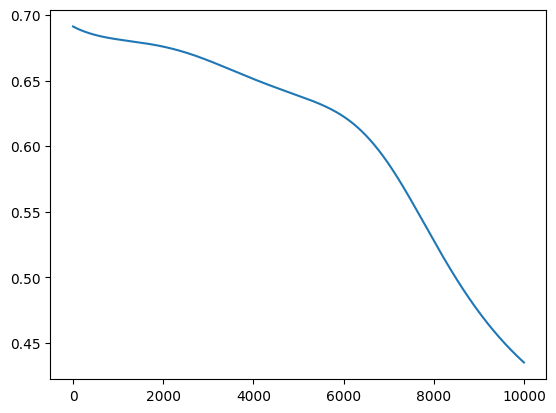

In [157]:
#Plot the cost function
plt.plot(J)

In [158]:
print("Final W1\n", W1)
print("Final W2\n", W2)
print("Final b1\n", b1)
print("Final b2\n", b2)

Final W1
 [[-0.92546521  0.91898721]
 [-0.01954308  1.08689872]
 [-0.60025008  0.57051794]
 [-0.03096274  0.75006038]
 [ 0.05347952 -0.38921071]
 [-1.07512816 -0.97692579]
 [ 0.02384404 -0.9578419 ]
 [ 0.06441801 -0.29179159]
 [-0.536789    0.50381078]
 [ 0.09523089 -0.06173607]]
Final W2
 [[-1.16287669  0.92559479 -0.59178513  0.52047742 -0.21070954  1.74660465
  -0.75787402 -0.17893968 -0.50155385 -0.10504181]]
Final b1
 [[-0.17564369]
 [-0.05790586]
 [-0.01803212]
 [-0.02964978]
 [ 0.01151433]
 [-0.10694641]
 [ 0.0461356 ]
 [ 0.0085415 ]
 [ 0.00125149]
 [ 0.00368405]]
Final b2
 [[0.02917522]]


<h2> Accuracy for training set
    

In [159]:
#Obtain the value of A2
Z1,A1,Z2,A2=forward_propagation(X_train,W1,W2,b1,b2)
A2

array([[0.19658782, 0.13915248, 0.731803  , 0.85031256, 0.58232577,
        0.53911788, 0.57914723, 0.22053112, 0.81461184, 0.82286122,
        0.08806395, 0.49600974, 0.68892504, 0.52505794, 0.51239805,
        0.52765339, 0.59957351, 0.37413391, 0.26463675, 0.77534626,
        0.84968085, 0.72929726, 0.46115989, 0.15412723, 0.593932  ,
        0.23541712, 0.46947539, 0.89252385, 0.80365783, 0.24247673,
        0.44688742, 0.49459061, 0.60343411, 0.44701201, 0.79177392,
        0.75949332, 0.48756964, 0.40109663, 0.24528112, 0.10874652,
        0.85657207, 0.09063637, 0.79451962, 0.17549407, 0.83543949,
        0.80705588, 0.88639031, 0.6851804 , 0.2610902 , 0.85026262,
        0.58775131, 0.74583052, 0.46628037, 0.5919724 , 0.21045266,
        0.08674924, 0.72079497, 0.63491605, 0.47530243, 0.39654593,
        0.91049841, 0.56371406, 0.87921082, 0.50170631, 0.49860409,
        0.79708028, 0.20241655, 0.49135424, 0.8031526 , 0.40072601,
        0.17899723, 0.48285227, 0.2253357 , 0.83

In [160]:
y_train_pred= np.where(A2>0.5, 1,0)

In [161]:
y_train_pred

array([[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [162]:
count= np.where(y_train_pred==y_train,1,0)
print(np.sum(count))
accuracy= np.sum(count)/y_train.shape[1]
print("Training Accuracy is: ",accuracy)

238
Training Accuracy is:  0.85


<h1>Testing the dataset</h1>

In [163]:
#Read the train dataset
Test= pd.read_csv('C:/Users/mauli/Documents/NeuralTEE/flowerTest.csv')

In [164]:
#Visualize the dataset
Test.head()

,X,Y,Class
0,-0.103593,-1.403251,1
1,3.037690,-1.673477,0
2,1.570134,2.582867,0
3,1.462983,3.836927,0
4,3.028389,1.757974,1


In [165]:
#Extract the predictor variables
X_test= Test.drop(['Class'],axis=1)

In [166]:
#Extract the target variable
y_test=Test[['Class']]

In [167]:
#taking transpose of test data
X_test=X_test.transpose()
y_test=y_test.transpose()

In [168]:
#visualize test predictor data
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
X,-0.103593,3.037690,1.570134,1.462983,3.028389,-0.302186,-1.270730,0.151863,0.036582,0.166454,...,0.474591,-0.488904,2.949686,1.389470,1.503018,-1.727579,-2.632754,-3.593011,-1.772843,-0.068076
Y,-1.403251,-1.673477,2.582867,3.836927,1.757974,-0.292017,-3.800502,-0.000262,-0.720267,1.776140,...,2.477938,-2.486356,1.738295,-1.143675,-3.694890,1.297922,-1.524978,1.087357,3.413995,0.978173


In [169]:
#visualize test target data
y_test.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Class,1,0,0,0,1,0,1,0,1,0,...,0,1,1,0,1,1,0,1,0,0


In [170]:
y_test=np.array(y_test) #Convert target dataframe to numpy array

In [171]:
Z1,A1,Z2,A2=forward_propagation(X_test,W1,W2,b1,b2)

In [172]:
y_test_pred= np.where(A2>0.5, 1,0)


In [173]:
y_test

array([[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [174]:
y_test_pred

array([[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0]])

In [175]:
count= np.where(y_test_pred==y_test,1,0)
accuracy= np.sum(count)/y_test.shape[1]
print("Testing Accuracy is: ",accuracy)

Testing Accuracy is:  0.8583333333333333
